<a href="https://colab.research.google.com/github/KiaiAji/Model_ANN/blob/main/Metode_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

Preprocessing

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA reduksi dimensi (2 komponen utama)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# One-hot encoding label
y_encoded = to_categorical(y)

# Split data train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_encoded, test_size=0.2, random_state=42
)

Explained variance ratio: [0.72962445 0.22850762]


Model ANN

In [ ]:
model = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=5,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3697 - loss: 1.1122 - val_accuracy: 0.4667 - val_loss: 1.0303
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4480 - loss: 1.0546 - val_accuracy: 0.4333 - val_loss: 0.9678
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3303 - loss: 1.0030 - val_accuracy: 0.4000 - val_loss: 0.9079
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4082 - loss: 0.9486 - val_accuracy: 0.5667 - val_loss: 0.8599
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5996 - loss: 0.8571 - val_accuracy: 0.6333 - val_loss: 0.8183
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6504 - loss: 0.8939 - val_accuracy: 0.7667 - val_loss: 0.7809
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7357 - loss: 0.8411 - val_accuracy: 0.8000 - val_loss: 0.7489
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7979 - loss: 0.7399 - val_accuracy: 0.8000 - val_loss: 0.7147
Ep

Evaluasi Model


Accuracy dengan PCA: 90.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


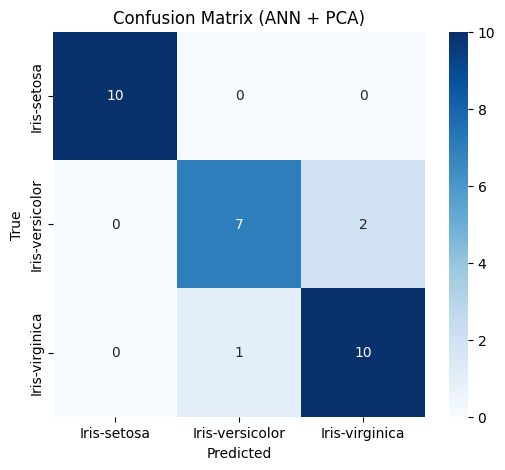


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



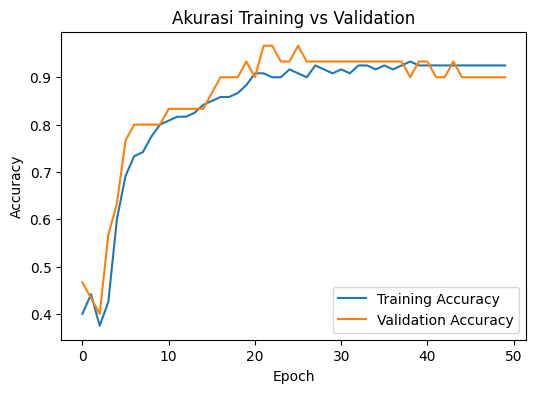

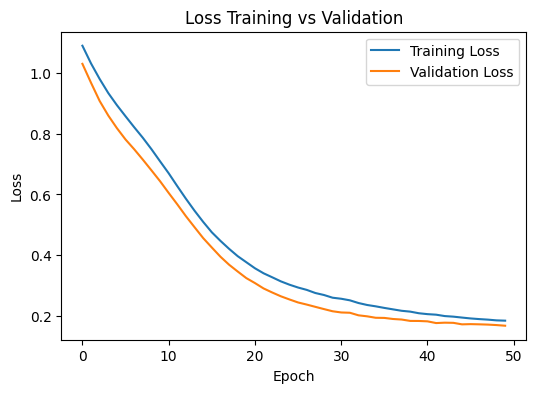

In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy dengan PCA: {acc*100:.2f}%")

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (ANN + PCA)")
plt.show()

# Laporan klasifikasi
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Grafik akurasi training vs validasi
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Akurasi Training vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grafik loss training vs validasi
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Training vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Implementasi Model

In [ ]:
def predict_iris(sample, scaler, pca, model, class_names):
    """
    sample: list atau array dengan 4 fitur [sepal_length, sepal_width, petal_length, petal_width]
    scaler: objek StandardScaler yang sudah fit
    pca: objek PCA yang sudah fit
    model: ANN terlatih
    class_names: daftar nama kelas (['setosa', 'versicolor', 'virginica'])
    """
    sample = np.array(sample).reshape(1, -1)          # ubah ke shape (1,4)
    sample_scaled = scaler.transform(sample)          # scaling
    sample_pca = pca.transform(sample_scaled)         # reduksi PCA
    pred = model.predict(sample_pca)                  # prediksi
    pred_class = np.argmax(pred, axis=1)[0]           # ambil kelas dengan probabilitas tertinggi
    return class_names[pred_class], pred

In [ ]:
# Daftar nama kelas
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

# Contoh data baru: [sepal_length, sepal_width, petal_length, petal_width]
sample = [5.9,3,4.2,1.5]

label, prob = predict_iris(sample, scaler, pca, model, class_names)
print("Prediksi kelas:", label)
print("Probabilitas:", prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediksi kelas: Iris-versicolor
Probabilitas: [[0.00300376 0.9262767  0.07071957]]
